In [ ]:
import pandas as pd
raw_df = pd.read_csv('/content/bank-additional-full.csv', header=None)
print(raw_df.shape)
print(raw_df.head(2))


(41189, 1)
                                                   0
0  age;"job";"marital";"education";"default";"hou...
1  56;"housemaid";"married";"basic.4y";"no";"no";...


In [ ]:
df = raw_df[0].str.split(';', expand=True)
print(df.shape)
print(df.head(2))


(41189, 21)
    0            1          2            3          4          5       6   \
0  age        "job"  "marital"  "education"  "default"  "housing"  "loan"   
1   56  "housemaid"  "married"   "basic.4y"       "no"       "no"    "no"   

            7        8              9   ...          11       12          13  \
0    "contact"  "month"  "day_of_week"  ...  "campaign"  "pdays"  "previous"   
1  "telephone"    "may"          "mon"  ...           1      999           0   

              14              15                16               17  \
0     "poutcome"  "emp.var.rate"  "cons.price.idx"  "cons.conf.idx"   
1  "nonexistent"             1.1            93.994            -36.4   

            18             19    20  
0  "euribor3m"  "nr.employed"   "y"  
1        4.857           5191  "no"  

[2 rows x 21 columns]


In [ ]:
df.columns = df.iloc[0]  # Set first row as header
df = df[1:]  # Drop the first row
df.reset_index(drop=True, inplace=True)
print(df.columns.tolist())  # Should include 'y'


['age', '"job"', '"marital"', '"education"', '"default"', '"housing"', '"loan"', '"contact"', '"month"', '"day_of_week"', '"duration"', '"campaign"', '"pdays"', '"previous"', '"poutcome"', '"emp.var.rate"', '"cons.price.idx"', '"cons.conf.idx"', '"euribor3m"', '"nr.employed"', '"y"']


In [ ]:
df.columns = df.columns.str.strip().str.replace('"', '')
print(df.columns.tolist())  # ✅ Should print actual column names


['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [ ]:
print(df['y'].unique())  # Should be ['no', 'yes']


['"no"' '"yes"']


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df_encoded = df.copy()

# Label encode binary columns
le = LabelEncoder()
binary_cols = ['y', 'default', 'housing', 'loan']

for col in binary_cols:
    df_encoded[col] = df_encoded[col].str.replace('"', '').str.strip()  # clean extra quotes/spaces
    df_encoded[col] = le.fit_transform(df_encoded[col])  # yes=1, no=0

# One-hot encode the rest
df_encoded = pd.get_dummies(df_encoded, drop_first=True)


In [ ]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


Logistic Regression F1 Score: 0.481638418079096
Random Forest F1 Score: 0.38339622641509435


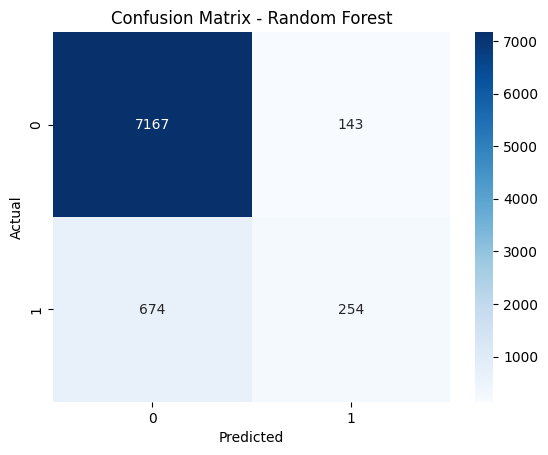

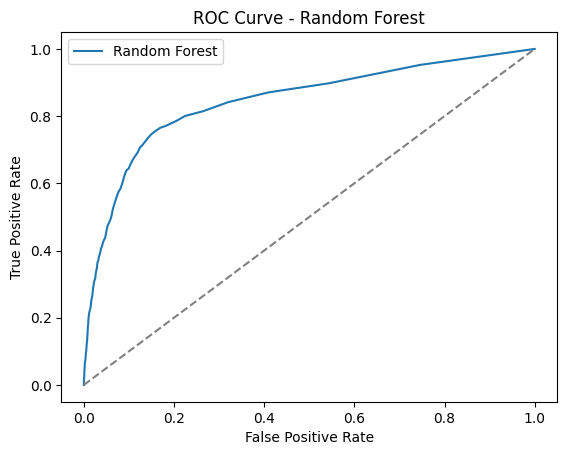

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# F1 Scores
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_lr))
print("Random Forest F1 Score:", f1_score(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve - Random Forest
y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()
